This notebook shows a concise example of the DRAid framework.

There are some options which you can change if interested.

## Configure

Configure the required information. In particular, the `service` must be a valid SPARQL endpoint containing provenance in a supported scheme.

In [14]:
import draid
from draid import study_helper as sh

EXAMPLE_SERVER_URL = 'http://127.0.0.1:3030'

EXAMPLE_SERVICES = {
    'cyclone_tracking': (f'{EXAMPLE_SERVER_URL}/cyclone_tracking', 'CWLPROV'),
    'mt3d-1': (f'{EXAMPLE_SERVER_URL}/mt3d-create_cmt', 'SPROV'),
    'mt3d-2': (f'{EXAMPLE_SERVER_URL}/mt3d-specfem', 'CWLPROV'),
    'mt3d-3': (f'{EXAMPLE_SERVER_URL}/mt3d-download', 'SPROV'),
    'mt3d-4': (f'{EXAMPLE_SERVER_URL}/mt3d-preproc', 'SPROV'),
    'mt3d-5': (f'{EXAMPLE_SERVER_URL}/mt3d-pyflex', 'SPROV'),
}

service, scheme = EXAMPLE_SERVICES['cyclone_tracking']
# service, scheme = EXAMPLE_SERVICES['mt3d-1']

rule_db = 'rule-db-all.json'
obligation_db = 'obligation-db.json'

h = sh.Helper(service, scheme, rule_db, obligation_db)

## Visualize original data-flow graph

We can visualize the original data-flow graph, which can be compared with the [reasoning results below](#Visualise-results).

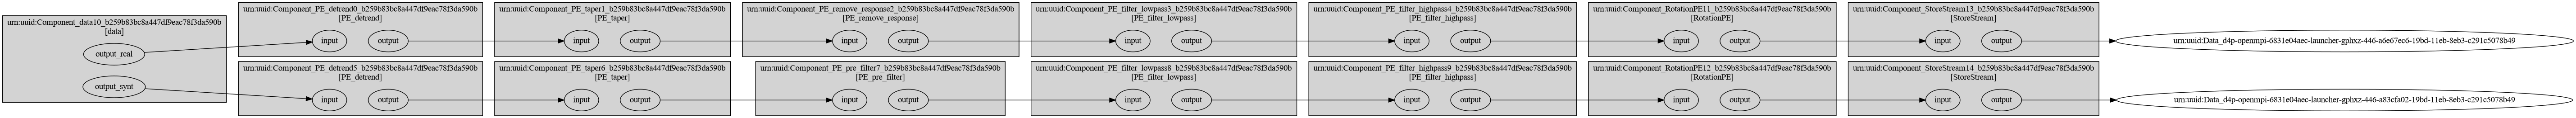

In [15]:
h.visualize()

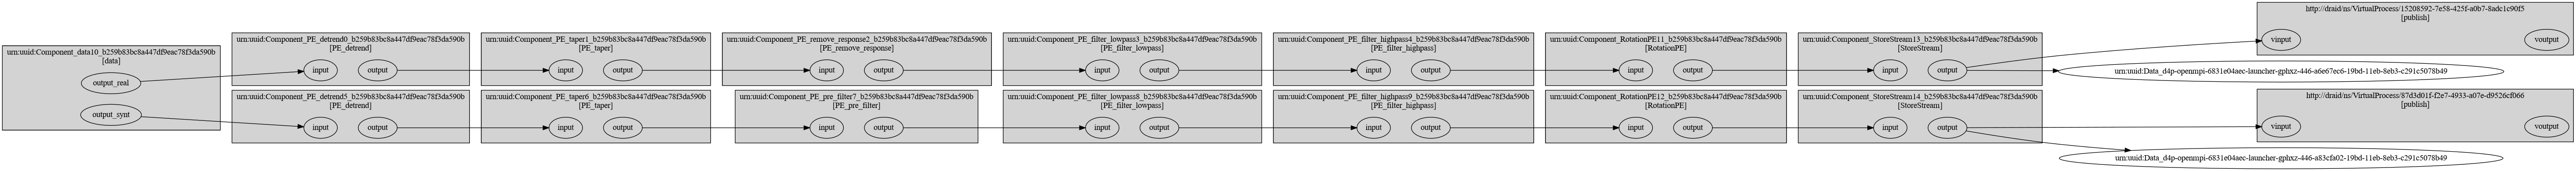

In [16]:
h.add_virtual_process('publish')  # This adds a "virtual" process representing a human action.
    # You can replace 'publish' with any string you like. Or you can simply comment it out.
# h.add_virtual_process('random_function_name')

h.visualize()

## Call reasoner

Call the reasoner and obtain the results.

In [18]:
activated_obligations = h.call_reasoner()
activated_obligations

Finished Initialization


{rdflib.term.URIRef('urn:uuid:Component_data10_b259b83bc8a447df9eac78f3da590bfe'): [(Acknowledge [fed_literature(string XXXXXX)])],
 rdflib.term.URIRef('http://draid/ns/VirtualProcess/15208592-7e58-425f-a0b7-8adc1c90f5c2'): [(Cite [AC_network(string Institute Of Geosciences, Energy, Water And Environment. (2002). Albanian Seismological Network [Data set]. International Federation of Digital Seismograph Networks. https://doi.org/10.7914/SN/AC)]),
  (Acknowledge [ORFEUS_EIDA(string We acknowledge ORFEUS and EIDA for providing the waveform data.)])],
 rdflib.term.URIRef('http://draid/ns/VirtualProcess/87d3d01f-f2e7-4933-a07e-d9526cf066b7'): [(Acknowledge [INGV(string Instituto Nazionale Di Geofisica E Vulcanologia)]),
  (Include [CC_BY_SA_4(url https://creativecommons.org/licenses/by/4.0/)])],
 rdflib.term.URIRef('http://draid/ns/VirtualProcess/39e49b5d-e463-4a28-a284-916ce78a05f2'): [(Cite [AC_network(string Institute Of Geosciences, Energy, Water And Environment. (2002). Albanian Seismo

## Visualise results

This is very similar to the `main.draw()` function, but modified to better suit the notebook.

We can compare the result here with the [original data-flow graph above](#Visualize-original-data-flow-graph).

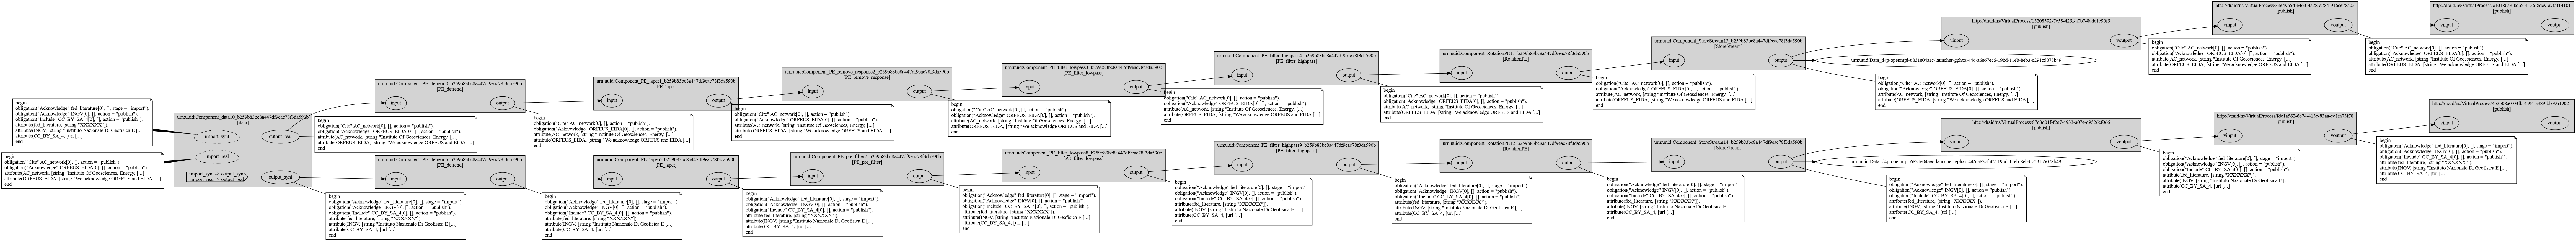

In [19]:
h.visualize(with_rules=True)

## Manage previous obligations

Print all stored obligations, or modify the store.  
Similar to a self-managed checklist.

In [ ]:
# h.delete_obligation(2)

# h.delete_obligation(range(len(h.list_all_obligations())))

h.list_all_obligations()